# <center> Python pour les TP/TIPE : équations </center>

***

**1)** Résoudre une équation algébrique

**2)** Résoudre une équation différentielle ordinaire

**3)** Obtenir un portrait de phase

***

**Chargement des bibliothèques**

In [10]:
# Pour avoir les graphiques qui s'affichent sous le code
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as scpo
from scipy import integrate as scpi

# Pour avoir une écriture jolie dans les graphiques
plt.rc('mathtext', fontset="cm")

***

## **1) Résoudre une équation algébrique**

***

À titre d'exemple, on souhaite résoudre

$$ 1 - \frac{x}{5} - \mathrm{e}^{-x} = 0 $$

Il suffit de définir la fonction $f$.

$$ f(x) = 1 - \frac{x}{5} - \mathrm{e}^{-x} $$

et d'utiliser la méthode **fsolve** qui résout $f = 0$.

In [19]:
def f (x) :
    return 1. - x / 5. - np.exp(-x)

res = scpo.fsolve(f, [2.])  #où 2 est une valeur initiale pour l'algorithme

print("Une solution est x = " + str(round(res[0],3)))

Une solution est x = 4.965


***

## **2) Résoudre une équation différentielle ordinaire**

***

On souhaite résoudre l'équation différentielle ordinaire d'ordre 1 suivante : 

$$ y' = -y + 4 \cos (5\, t) $$

avec la condition initiale

$$ y(0) = 3 $$

qui peut par exemple correspondre à filtre du premier ordre excité sinusoïdalement. On commence par définir le système via la fonction

$$ f(y,\, t) = - y + 4 \cos (5\, t) $$

telle que $y' = f(y, t)$.

In [12]:
def eq(y, t) :
    return - y + 4. * np.cos(5. * t)

Et on résout l'équation différentielle avec la méthode **odeint**.

In [13]:
t = np.linspace(0.,10.,200) #définition du temps

y = scpi.odeint(eq,3,t) # où 3 est la condition initiale

Et on peut tracer la solution.

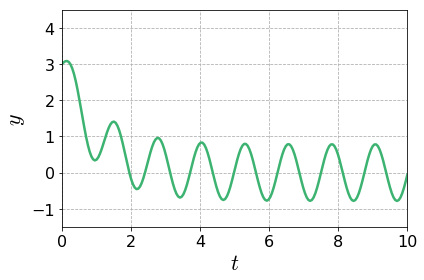

In [15]:
plt.xlim([0.,10])
plt.ylim([-1.5, 4.5])
plt.grid(linestyle='dashed')
plt.xlabel(r"$t$", fontsize=22)
plt.ylabel(r"$y$", fontsize=22)

plt.plot(t, y, color='mediumseagreen', linewidth=2.5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

***

## **3) Obtenir un portrait de phase**

***

On souhaite  maintenant résoudre et tracer le portrait de phase de l'équation différentielle ordinaire d'ordre 2 suivante

$$ \ddot{x} + \frac{1}{3}\, \dot{x} + x = 0 $$

avec

$$ x(0) = 2 \qquad \text{et} \qquad \dot{x}(0) = 0 $$

qui correspond à un oscillateur harmonique amorti. Pour cela, on le réécrit comme deux EDO d'ordre 1

$$ \left \lbrace \begin{eqnarray}
\dot{x} & = & y \\
\dot{y} & = & - \frac{1}{3}\, y - x
\end{eqnarray}
\right.
$$

et on le résoud avec la même méthode que précédemment, en écrivant $z = (x,\, y)$.

In [16]:
def eq(z, u) :
    x = z[0]
    y = z[1]
    dxdt = y
    dydt = - 1 / 3. * y - x
    return [dxdt, dydt]

In [17]:
t = np.linspace(0.01,30.01,400)

z = scpi.odeint(eq,[2,0],t)

On récupère $x$ et $y$ comme les deux colonnes de $z$, puis on trace $y = \dot{x}$ en fonction de $x$ pour avoir le portrait de phase. 

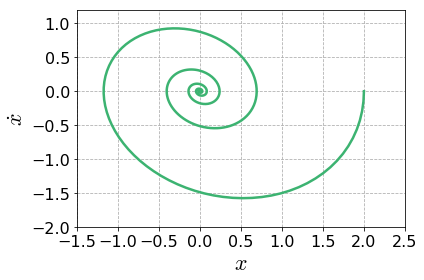

In [21]:
x, y = z[:,0], z[:,1]

plt.xlim([-1.5,2.5])
plt.ylim([-2, 1.2])
plt.grid(linestyle='dashed')
plt.xlabel(r"$x$", fontsize=22)
plt.ylabel(r"$\dot{x}$", fontsize=22)

plt.plot(x, y, color='mediumseagreen', linewidth=2.5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()